In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

requires_grad : Every Tensor has a flag: requires_grad that allows for fine grained exclusion of subgraphs from gradient computation and can increase efficiency.

In [3]:
# Create random input and output data
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Randomly initialize weights
w1 = torch.randn(D_in, H, requires_grad = True)
w2 = torch.randn(H, D_out, requires_grad = True)

In [4]:
learning_rate = 1e-6

In [5]:
x_list = []
loss_list = []

In [6]:
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    
    loss.backward()
    
    print("[*] t idx : ", t, " loss : ", loss.item())
    
    x_list.append(t)
    loss_list.append(loss.item())
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

[*] t idx :  0  loss :  34630796.0
[*] t idx :  1  loss :  30574292.0
[*] t idx :  2  loss :  32529136.0
[*] t idx :  3  loss :  33716772.0
[*] t idx :  4  loss :  30057680.0
[*] t idx :  5  loss :  21280758.0
[*] t idx :  6  loss :  12289174.0
[*] t idx :  7  loss :  6251576.0
[*] t idx :  8  loss :  3227798.75
[*] t idx :  9  loss :  1852670.5
[*] t idx :  10  loss :  1222602.875
[*] t idx :  11  loss :  901955.375
[*] t idx :  12  loss :  714481.125
[*] t idx :  13  loss :  589132.125
[*] t idx :  14  loss :  496693.0
[*] t idx :  15  loss :  424537.15625
[*] t idx :  16  loss :  366122.96875
[*] t idx :  17  loss :  317765.625
[*] t idx :  18  loss :  277218.78125
[*] t idx :  19  loss :  242939.828125
[*] t idx :  20  loss :  213698.296875
[*] t idx :  21  loss :  188612.09375
[*] t idx :  22  loss :  166989.453125
[*] t idx :  23  loss :  148249.421875
[*] t idx :  24  loss :  131967.171875
[*] t idx :  25  loss :  117762.421875
[*] t idx :  26  loss :  105329.53125
[*] t idx :  

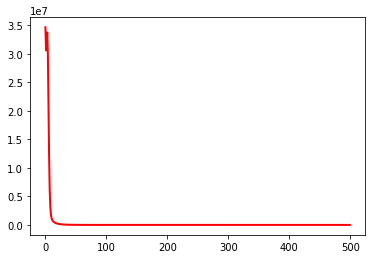

In [7]:
plt.plot(x_list, loss_list, "r-", linewidth=2, label="loss")
plt.show()